In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('imdb_top_1000.csv')

In [3]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [5]:
df[df['Certificate'].isna() & df['Meta_score'].isna() & df['Gross'].isna()].shape

(35, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [7]:
df['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [8]:
df['Gross']=df['Gross'].str.replace(',','')
df['Gross']=df['Gross'].astype('float64')

In [9]:
df['Genre'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


# Gross of Movies vs Number of Votes

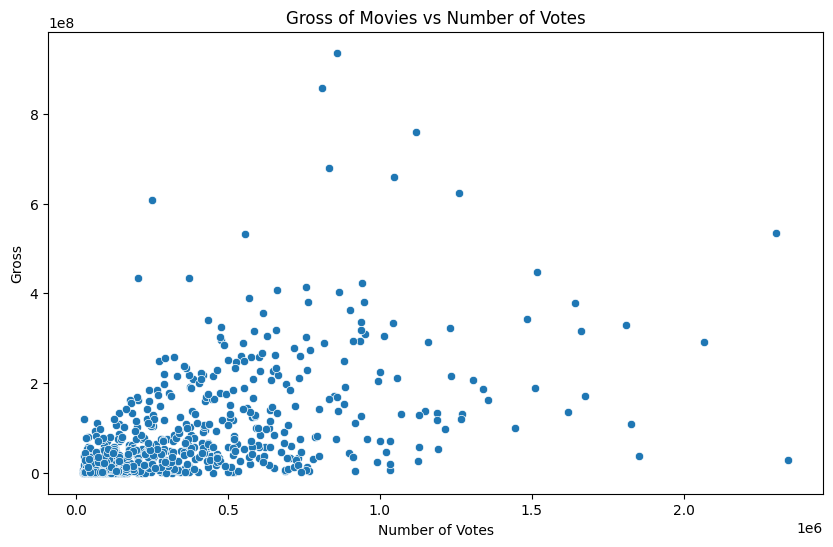

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='No_of_Votes',y='Gross')

#plt.xticks(rotation=90)
plt.title('Gross of Movies vs Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Gross')
#plt.tight_layout()
plt.show()

# Type of Certificate vs Average Gross

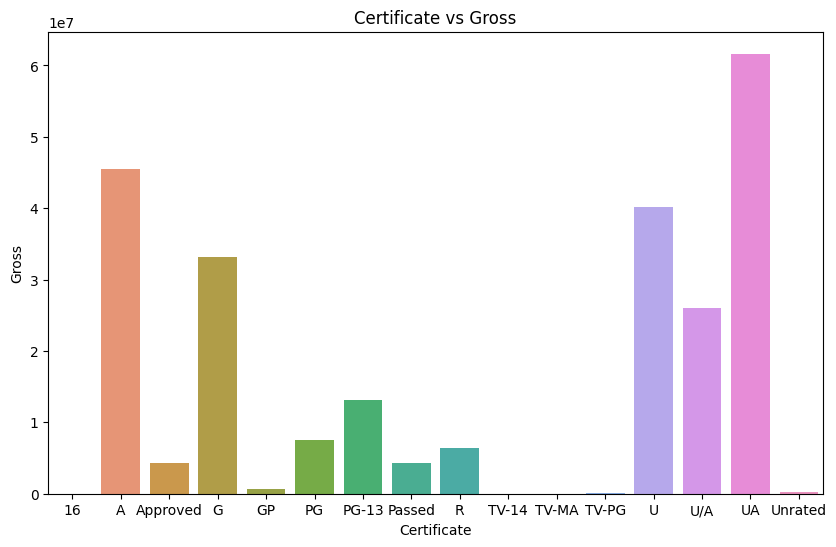

In [11]:
df2=df.groupby('Certificate')['Gross'].median().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=df2, x='Certificate',y='Gross')

#plt.xticks(rotation=90)
plt.title('Certificate vs Gross')
plt.xlabel('Certificate')
plt.ylabel('Gross')
#plt.tight_layout()
plt.show()

# Seperating Genres

In [12]:
allgenre=np.array(list(df['Genre'].unique()))
allgenre

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


In [13]:
genre={j.strip() for i in allgenre for j in i.split(',')}
genre=list(genre)
genre

['Sci-Fi',
 'Horror',
 'Crime',
 'War',
 'Action',
 'History',
 'Fantasy',
 'Musical',
 'Drama',
 'Sport',
 'Family',
 'Film-Noir',
 'Music',
 'Mystery',
 'Thriller',
 'Western',
 'Biography',
 'Comedy',
 'Adventure',
 'Animation',
 'Romance']

In [14]:
dfgenre=df.copy()

In [15]:
dfgenre['Genre']=dfgenre['Genre'].str.split(',')

In [16]:
dfgenre=dfgenre.explode('Genre')

In [17]:
dfgenre['Genre']=dfgenre['Genre'].str.strip()
dfgenre['Genre'].unique()

array(['Drama', 'Crime', 'Action', 'Adventure', 'Biography', 'History',
       'Sci-Fi', 'Romance', 'Western', 'Fantasy', 'Comedy', 'Thriller',
       'Animation', 'Family', 'War', 'Mystery', 'Music', 'Horror',
       'Musical', 'Film-Noir', 'Sport'], dtype=object)

In [18]:
dfgenre.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

# Distribution of Genre over Titles

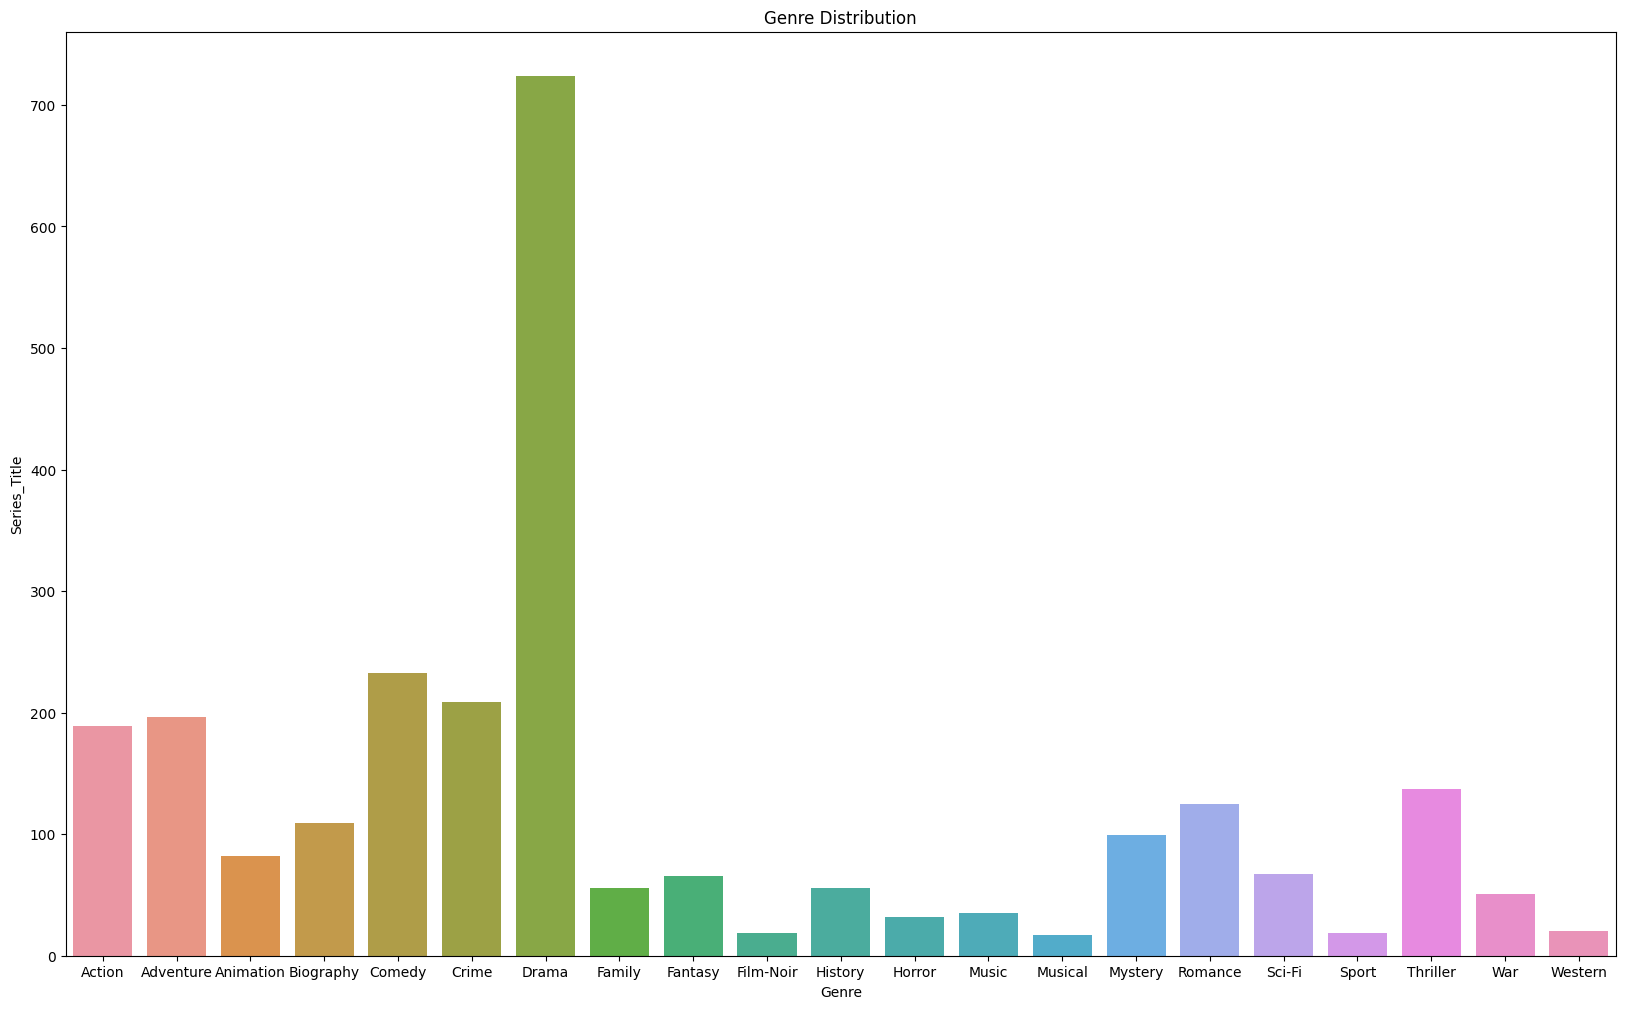

In [19]:
plt.figure(figsize=(20,12))
genrecount=dfgenre.groupby('Genre')['Series_Title'].count().reset_index()
genrecount
sns.barplot(genrecount, x='Genre',y='Series_Title')
plt.title('Genre Distribution')
plt.show()

# Cleaning Year Column


In [20]:
dfgenre[df['Released_Year'].str.contains(r'[^0-9]')]
dfgenre.loc[dfgenre['Series_Title']=='Apollo 13','Released_Year']=1995

<ipython-input-20-f0b96432f5e6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgenre[df['Released_Year'].str.contains(r'[^0-9]')]


In [21]:
dfgenre['Released_Year'] = pd.to_datetime(dfgenre['Released_Year'].astype(str), format='%Y')

# Genre Popularity Over Time

<Figure size 9000x8400 with 0 Axes>

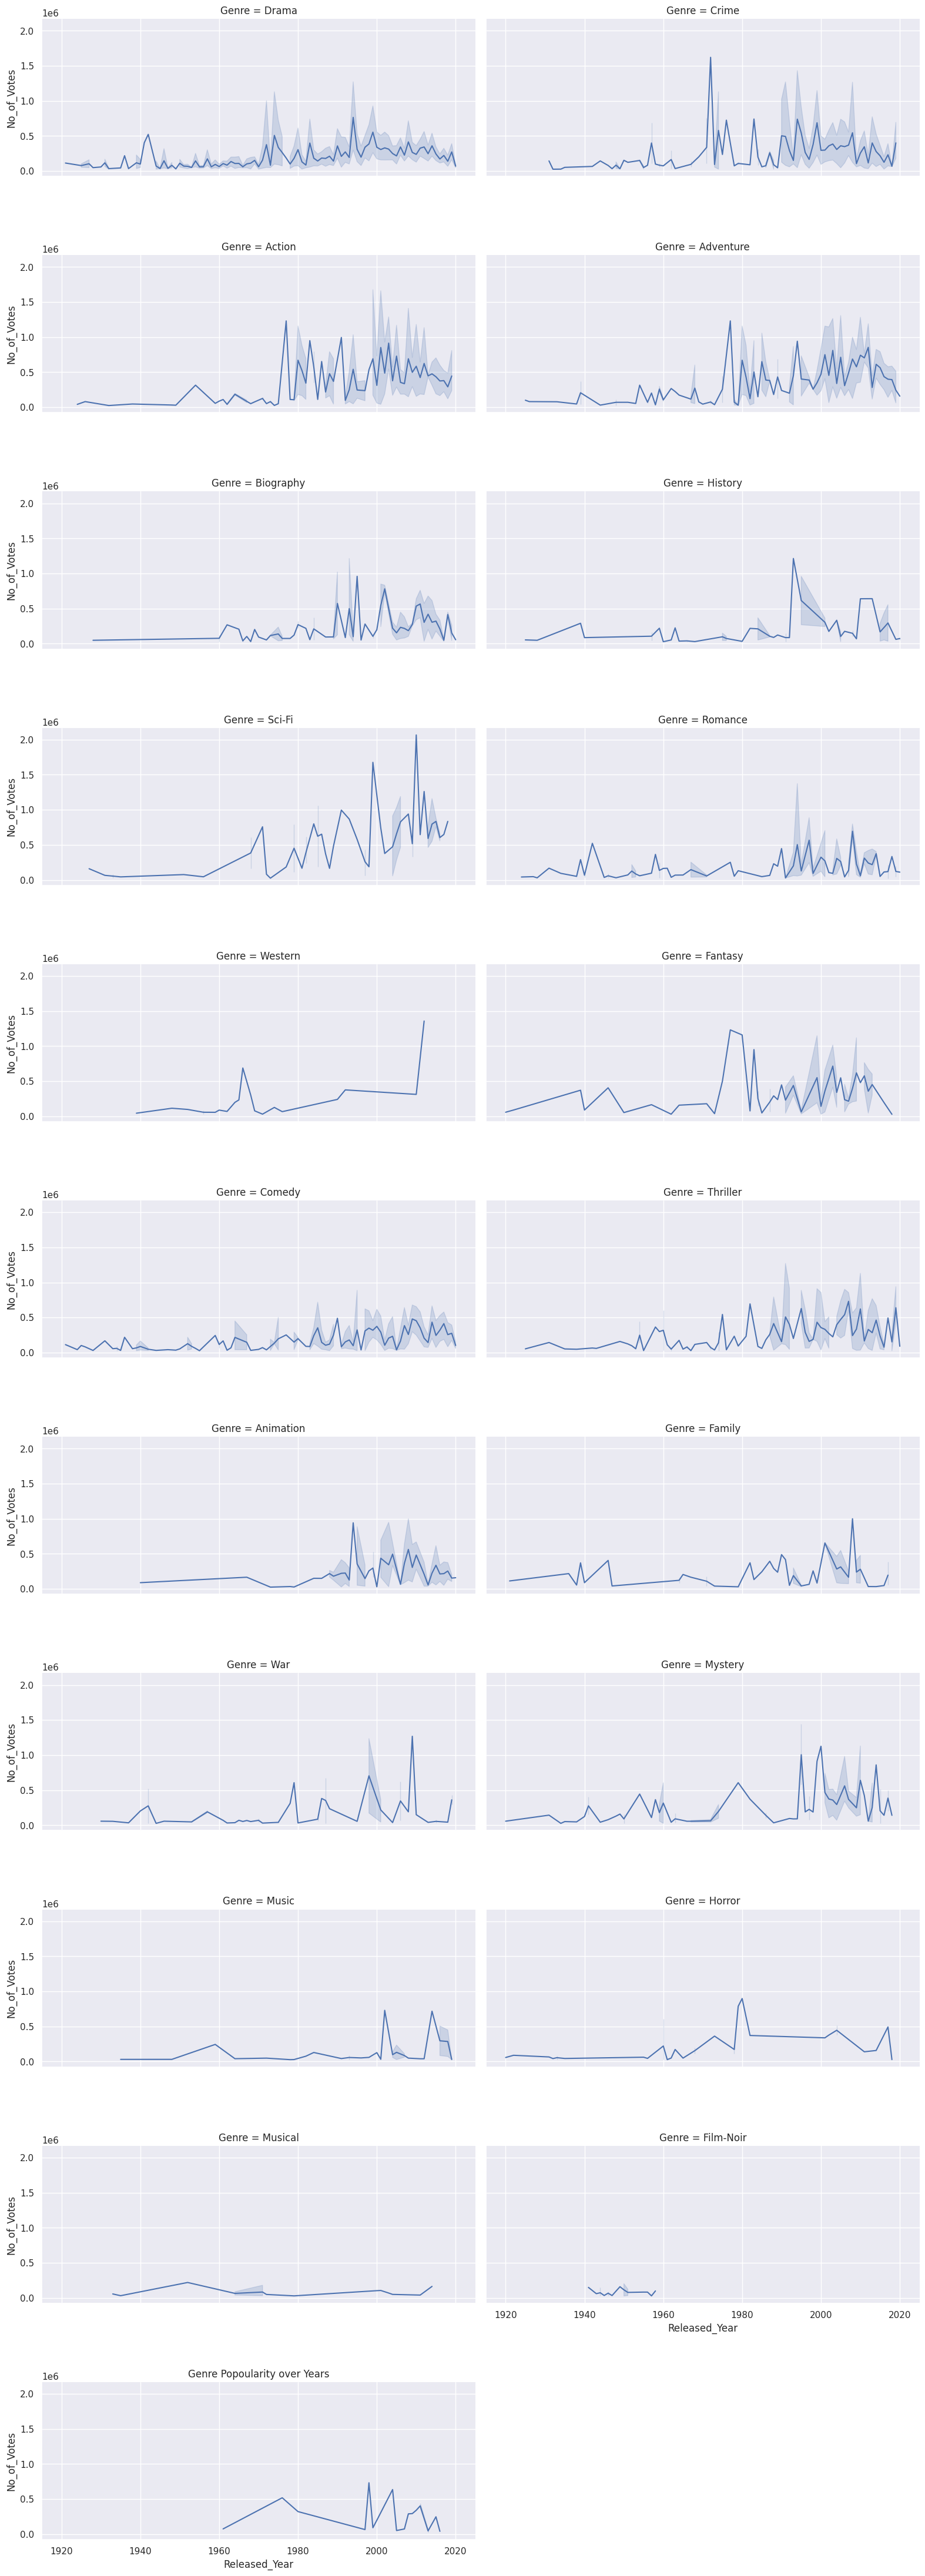

In [22]:
sns.set()
plt.figure(figsize=(30*3,12*7))
sns.relplot(data=dfgenre, x="Released_Year", y="No_of_Votes", col="Genre",col_wrap=2, height=4, kind='line',aspect=2)
plt.subplots_adjust(hspace=0.5)
plt.title('Genre Popoularity over Years')
plt.show()

In [23]:
dfgenre.dtypes

Poster_Link              object
Series_Title             object
Released_Year    datetime64[ns]
Certificate              object
Runtime                  object
Genre                    object
IMDB_Rating             float64
Overview                 object
Meta_score              float64
Director                 object
Star1                    object
Star2                    object
Star3                    object
Star4                    object
No_of_Votes               int64
Gross                   float64
dtype: object

In [24]:
avgrating=dfgenre.groupby('Genre')['IMDB_Rating'].mean().reset_index()

In [25]:
avgrating

,Genre,IMDB_Rating
0,Action,7.948677
1,Adventure,7.952041
2,Animation,7.930488
3,Biography,7.935780
4,Comedy,7.903433
5,Crime,7.954545
6,Drama,7.959392
7,Family,7.912500
8,Fantasy,7.931818
9,Film-Noir,7.989474


# Average Rating of Each Genre

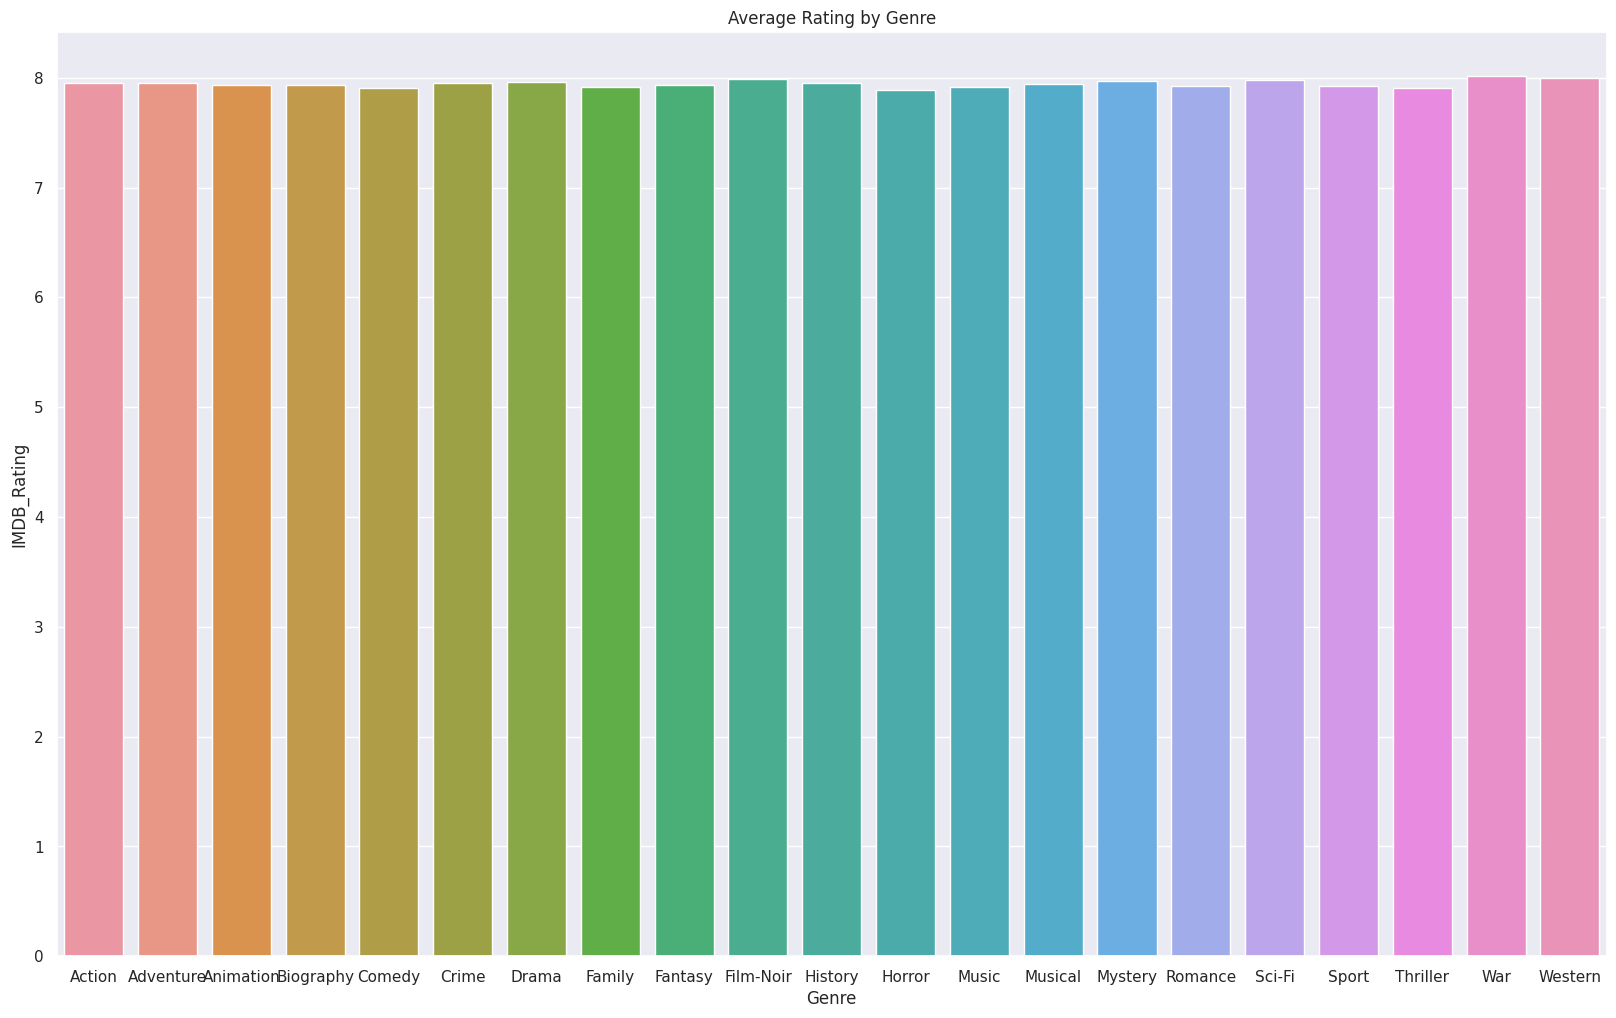

In [26]:
plt.figure(figsize=(20,12))
sns.barplot(data=avgrating, x='Genre',y='IMDB_Rating')
plt.title('Average Rating by Genre')
plt.show()


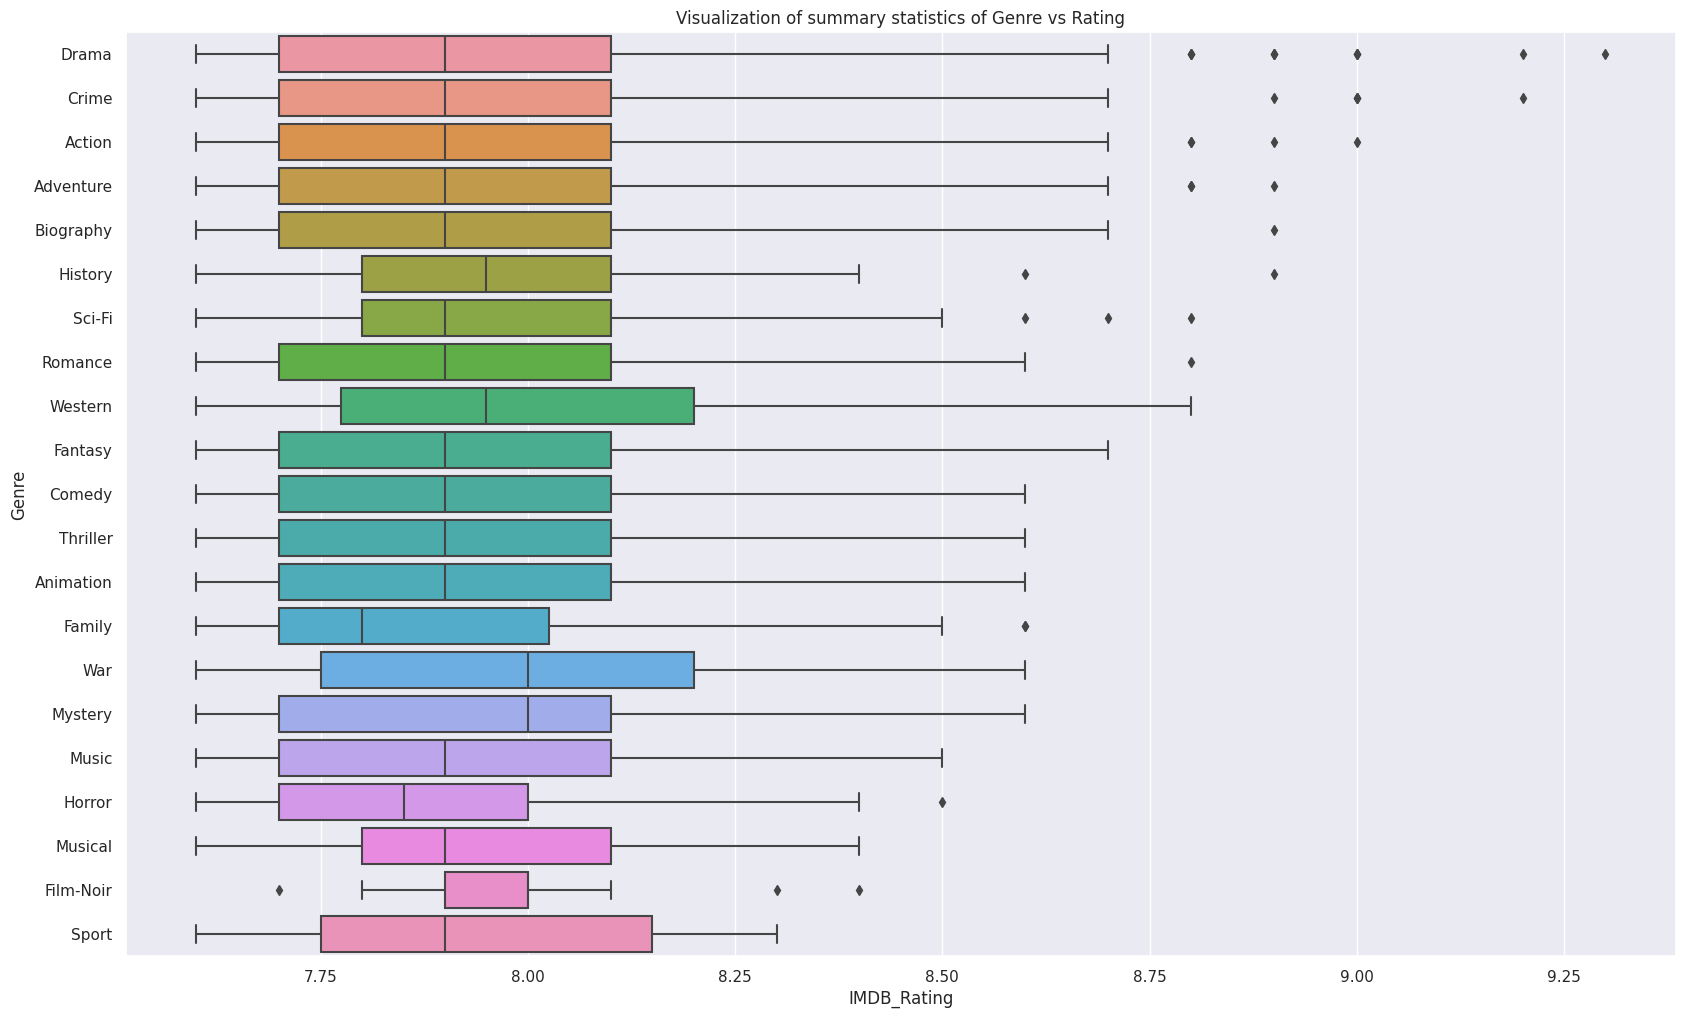

In [27]:
plt.figure(figsize=(20,12))
sns.boxplot(data=dfgenre, y='Genre',x='IMDB_Rating')
plt.title('Visualization of summary statistics of Genre vs Rating')
plt.show()


In [28]:
dfgenre['Runtime']=dfgenre['Runtime'].str.replace('min','').str.strip()
dfgenre['Runtime']=dfgenre['Runtime'].astype('int64')

In [29]:
dfgenre.dtypes

Poster_Link              object
Series_Title             object
Released_Year    datetime64[ns]
Certificate              object
Runtime                   int64
Genre                    object
IMDB_Rating             float64
Overview                 object
Meta_score              float64
Director                 object
Star1                    object
Star2                    object
Star3                    object
Star4                    object
No_of_Votes               int64
Gross                   float64
dtype: object

<ipython-input-30-69fc41452837>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=heatdf.corr()


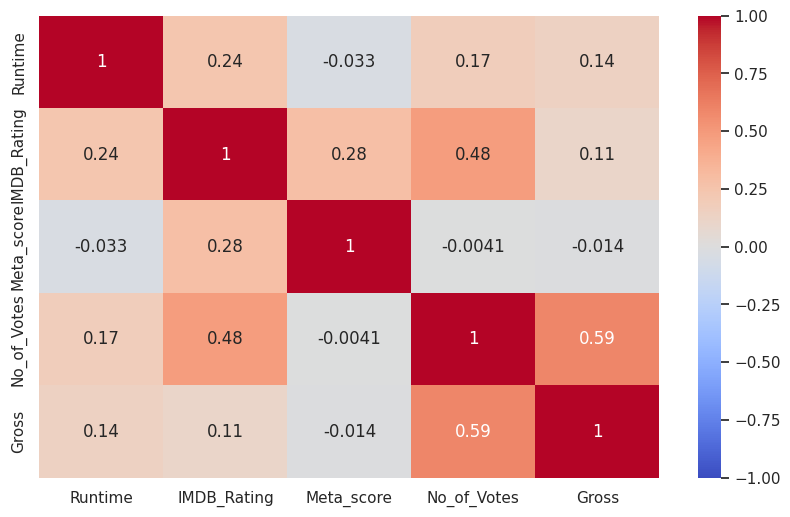

In [30]:
heatdf=dfgenre[['Released_Year','Runtime','IMDB_Rating','Meta_score','No_of_Votes','Gross']]
correlation_matrix=heatdf.corr()
plt.figure(figsize=(10,6))
sns.heatmap(data=correlation_matrix, annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.show()

# Top IMDB Ratings by Genre

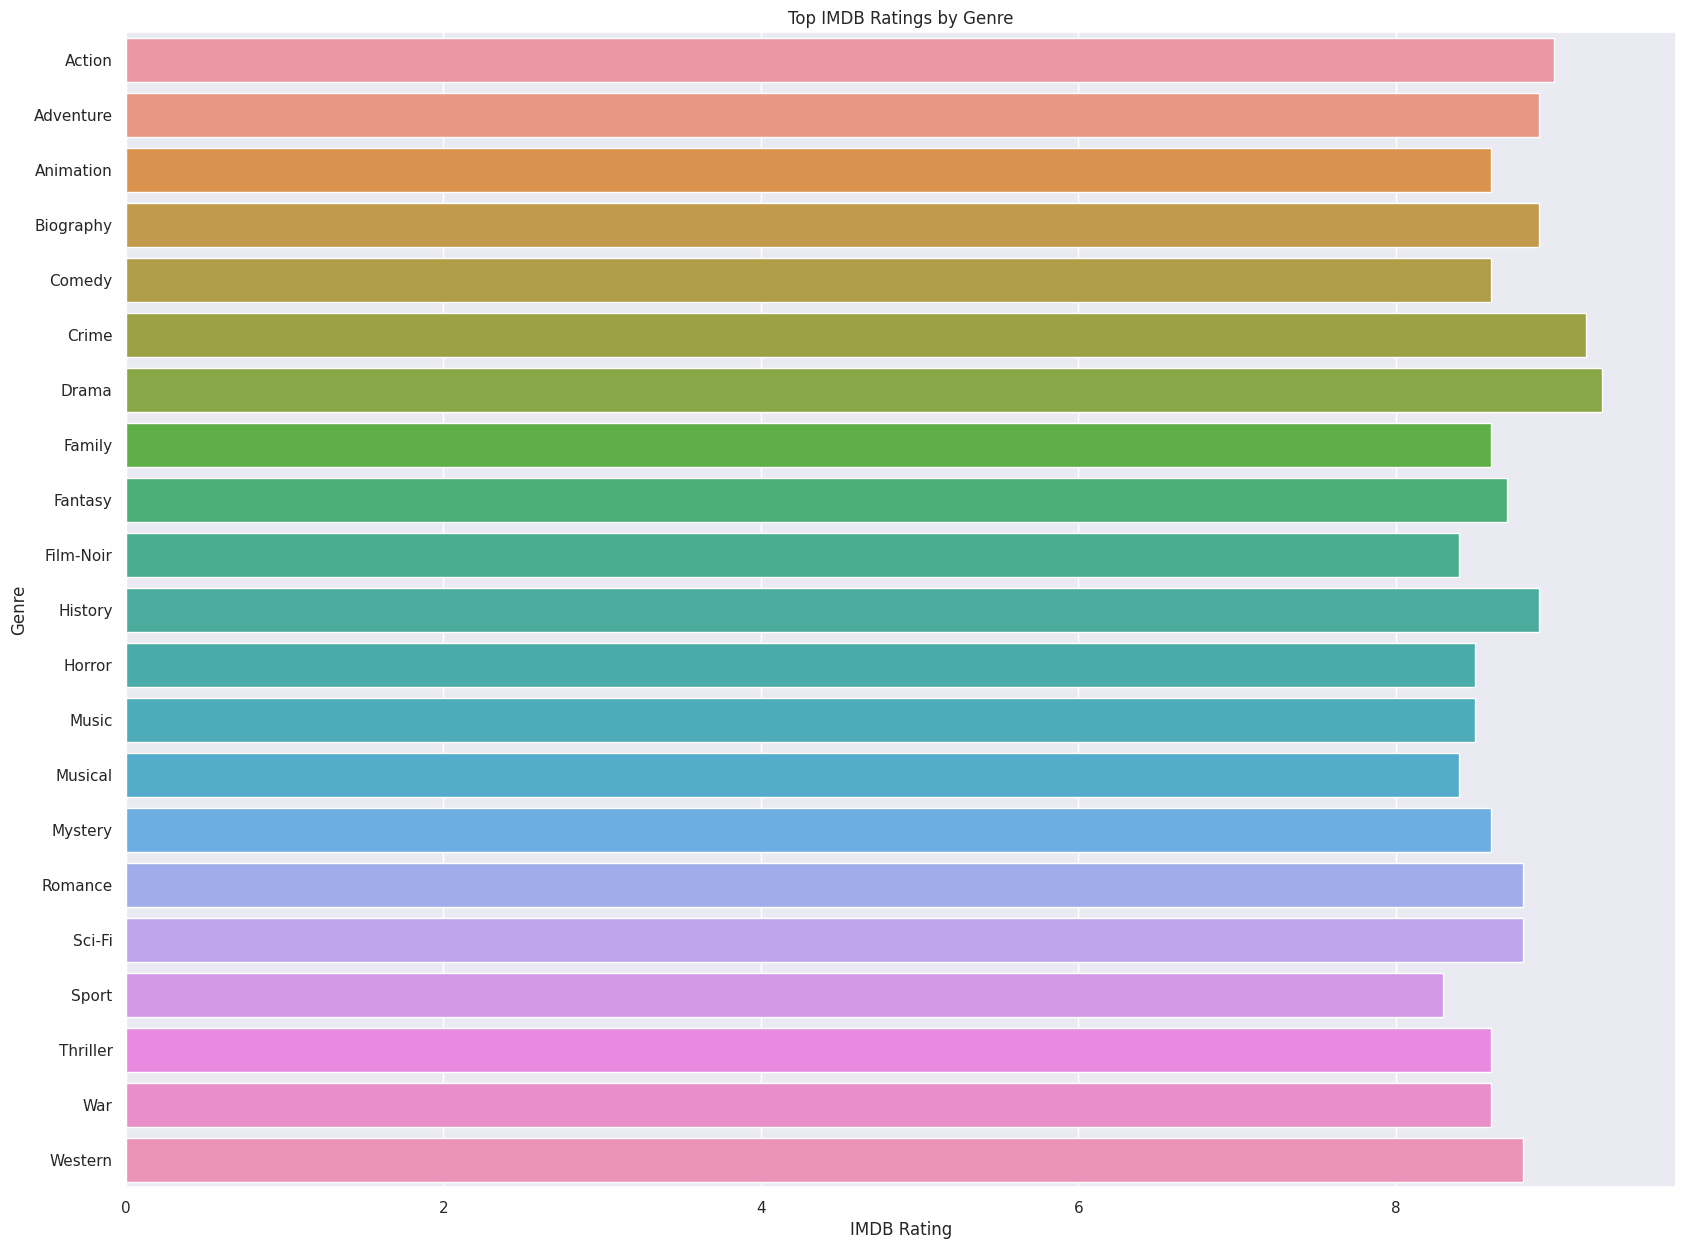

In [32]:

genretop=dfgenre.groupby(['Genre'])['IMDB_Rating'].max().reset_index()
plt.figure(figsize=(20,15))
sns.barplot(data=genretop, x='IMDB_Rating', y='Genre')
plt.xlabel('IMDB Rating')
plt.ylabel('Genre')
plt.title('Top IMDB Ratings by Genre')
plt.show()
